In [95]:
#import useful package 
from proj1_helpers import *
from ridge_regression import *
from split_data import *
from gradient_descent import *
from costs import *
from build_polynomial import *
from cross_validation import *
from least_squares import *
from plots import *
import numpy as np
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
#import the data
yb,inputdata,ids=load_csv_data("train.csv")

# Model 1: Linear Regression (without sparse data columns)

In [97]:
#Take only the columns that are not sparce
l = [np.count_nonzero(np.transpose(inputdata)[i] ==-999)==0 for i in range (30)]
xfilter = np.transpose(np.transpose(inputdata)[l])
xf=(xfilter-np.mean(xfilter,axis=0))/np.std(xfilter,axis=0)

In [98]:
def accuracys(y, tx, w):
    """Calculate the accuracy of a prediction
    """
    pred=predict_labels(w,tx)
    e=y-pred
    return 1-(sum(abs(e/2))/len(e))

In [99]:
def fast_buildpoly(x,ma,degree):
    return np.c_[ma,np.power(x, degree)]
    

0.781136


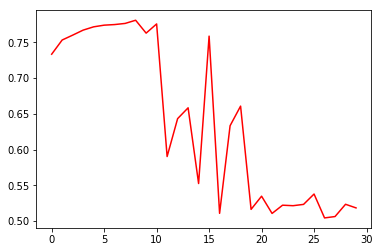

In [108]:
degree=np.arange(50)
acc=[]
polyx = np.ones((len(xfilter), 1))
for d in degree:
    polyx=fast_buildpoly(xfilter,polyx,d+1)
    w=least_squares(yb,polyx)
    acc.append(accuracys(yb,polyx,w))
plt.plot(degree, acc, 'r') 
print(max(acc))
plt.show()

By applying linear regression with different degree we find that the best fit seams to be 9

In [107]:
polytrain=build_poly(xfilter,9)
w=least_squares(yb,polytrain)
accuracys(yb,polytrain,w)

0.78113600000000005

# Model 2: Linear Regression (with 1 sparse data columns)

In [32]:
#Take only the columns that are not sparse
fil=[a[0]!=-999 for a in inputdata]
ya=yb[fil]
f=inputdata[fil]
l2 = [np.count_nonzero(np.transpose(f)[i] ==-999)==0 for i in range (30)]
xfilter2 = np.transpose(np.transpose(f)[l2])

0.785143898134


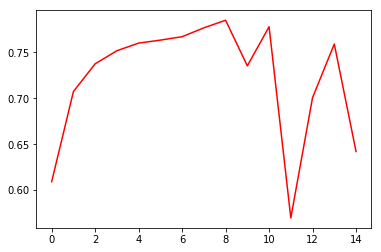

In [35]:
degree=np.arange(15)
acc=[]
for d in degree:
    polyx=build_poly(xfilter2,d)
    w=least_squares(ya,polyx)
    acc.append(accuracys(ya,polyx,w))
plt.plot(degree, acc, 'r') 
print(max(acc))
plt.show()

# Model 3: Linear regression with unknown set up to the mean

In [118]:
#replace unknown to mean
xfilter = [[x if x!=-999 else 0 for x in g] for g in inputdata] 

In [120]:
def predict_labels_train(weights, data, thr):
    """Generates class predictions given weights, and a test data matrix"""
    y_pred = np.dot(data, weights)
    y_pred[np.where(y_pred <= thr)] = -1
    y_pred[np.where(y_pred > thr)] = 1
    
    return y_pred

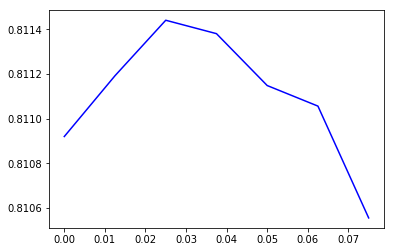

In [126]:
polys=build_poly(xfilter,9)
w=least_squares(yb,polys)  
thr=[0,0.0125,0.025,0.0375,0.05,0.0625,0.075]
err=[]
for t in thr:
    pred=predict_labels_train(w, polys, t)
    e=yb-pred
    err.append(1-(sum(abs(e/2))/len(e)))
plt.plot(thr, err, 'b') 

plt.show()

0.79534
0.793613333333


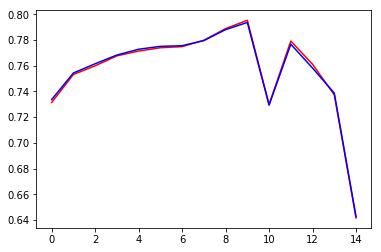

In [113]:
xtrain,xtest,ytrain,ytest=split_data(xfilter,yb,0.4)
degree=np.arange(15)
acc_train=[]
acc_test=[]
polyxt = np.ones((len(xtrain), 1))
polytestx = np.ones((len(xtest), 1))
for d in degree:
    polyxt=fast_buildpoly(xtrain,polyxt,d+1)
    polytestx=fast_buildpoly(xtest,polytestx,d+1)
    w=least_squares(ytrain,polyxt)
    acc_train.append(accuracys(ytrain,polyxt,w))
    acc_test.append(accuracys(ytest,polytestx,w))
plt.plot(degree, acc_train, 'r')
plt.plot(degree, acc_test, 'b') 
print(max(acc_train))
print(max(acc_test))

plt.show()

In [128]:
def specialmean(x):
    filt=[e!=-999 for e in x]
    return np.mean(x[filt])
def specialstd(x):
    filt=[e!=-999 for e in x]
    return np.std(x[filt])

In [132]:
#replace unknown to mean
intrans=np.transpose(inputdata)
means=[specialmean(a) for a in intrans]
std=[specialstd(a) for a in intrans]
inputa=[[x if x!=-999 else means[i] for x in intrans[i]] for i in range(len(intrans))] 
inr=np.transpose(inputa)
l=(inr-means)/std


0.81746
0.81634


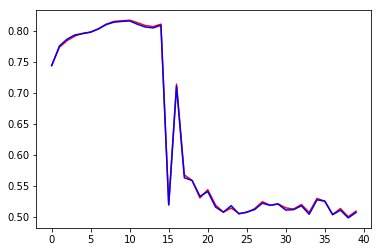

In [135]:
xtrain,xtest,ytrain,ytest=split_data(l,yb,0.8)
degree=np.arange(40)
acc_train=[]
acc_test=[]
polyxt = np.ones((len(xtrain), 1))
polytestx = np.ones((len(xtest), 1))
for d in degree:
    polyxt=fast_buildpoly(xtrain,polyxt,d+1)
    polytestx=fast_buildpoly(xtest,polytestx,d+1)
    w=least_squares(ytrain,polyxt)
    acc_train.append(accuracys(ytrain,polyxt,w))
    acc_test.append(accuracys(ytest,polytestx,w))
plt.plot(degree, acc_train, 'r')
plt.plot(degree, acc_test, 'b') 
print(max(acc_train))
print(max(acc_test))

plt.show()

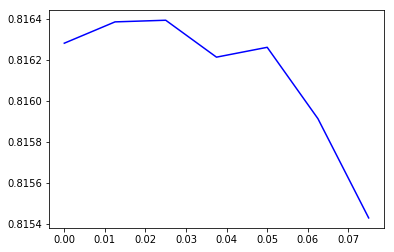

In [136]:
polys=build_poly(l,10)
w=least_squares(yb,polys)  
thr=[0,0.0125,0.025,0.0375,0.05,0.0625,0.075]
err=[]
for t in thr:
    pred=predict_labels_train(w, polys, t)
    e=yb-pred
    err.append(1-(sum(abs(e/2))/len(e)))
plt.plot(thr, err, 'b') 

plt.show()